# 단변량 데이터 탐색
- 각 데이터를 따로 탐색해 보자

In [1]:
import pandas as pd
data = pd.read_csv('data/Ex_CEOSalary.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [2]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


## 설명
- 기업의 매출(sales)과 수익(roe)이 CEO의 연봉(salary)에 미치는 영향관계를 파악하려는 데이터
- sales, roe는 독립변수, salary는 종속변수

## 범주형 자료의 탐색
- `industry`는 categorical variable이며 산업 유형을 나타냄

In [3]:
# value_counts()를 통해서 해당 컬럼의 범주별 빈도를 파악해 보자
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [4]:
# 산업의 의미를 파악하기 쉽게 replace를 이용하여 의미를 부여해 보자
data['industry'] = data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

### 시각화 해보자
- `matplotlib`을 이용하면 시각화가 가능함
- jupyter에서 `%matplotlit inline` 명령을 입력하면 주피터에서 결과를 바로 확인할 수 있음

<AxesSubplot:ylabel='industry'>

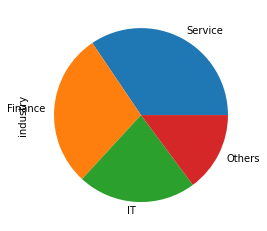

In [7]:
%matplotlib inline
data['industry'].value_counts().plot(kind="pie")  # kind를 bar, line 등으로 변경하면 표의 모양이 바뀜

<AxesSubplot:>

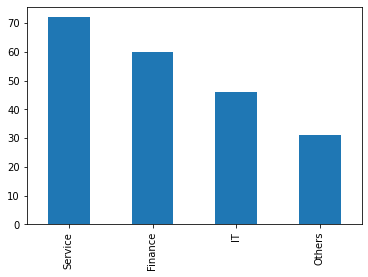

In [8]:
data['industry'].value_counts().plot(kind="bar")

## 연속형 자료의 탐색
- numeric/continuos variable은 `describe()`함수를 사용해서 기술통계량(descriptive statistics)를 확인할 수 있음
- 변수별 요약 통계량 확인이 가능하고 이를 통해 필요한 정보를 쉽게 얻을 수 있음

## 주목할만한 항목

### `mean(평균)`과 `50%,median(중위수)`의 차이
- 평균과 중위수가 일치할 수록 이상치가 적은 데이터를 의미함, 차이가 크면 이상치가 있다는 뜻

### `skewness(왜도)`[좌우대칭 확인용]
- skewness의 값은 0일 경우 정규분포와 일치하여 좌우가 대칭된 형태임을 알려주는 지표임
- skewness의 값이 양수일 경우 => 왼쪽에 자료가 더 많이 분포되어 있고, 오른쪽에 이상치들이 있다는 뜻
- skewness의 값이 음수일 경우 => 오른쪽에 자료가 더 많이 분포되어 있고, 왼쪽에 이상치들이 있다는 뜻
- skewness의 값이 2를 넘으면 한쪽으로 치우쳐져 있다는 의미로 해석 가능

### `kurtosis(첨도)`[중심쏠림 확인용]
- kurtosis의 값은 0일 경우 정규분포의 높이와 동일함
- kurtosis의 값이 클수록 중심에 자료가 많이 몰료있다는 의미

In [9]:
# describe() 함수로 기술통계량을 확인 해보자
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [13]:
# 평균과 중위수의 차이를 확인해 보자
data.mean() - data.median()

/var/folders/9q/gg420n2j1kscyj2snxyxwtyc0000gn/T/ipykernel_27452/3698401907.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean() - data.median()
/var/folders/9q/gg420n2j1kscyj2snxyxwtyc0000gn/T/ipykernel_27452/3698401907.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean() - data.median()


salary     242.119617
sales     3218.593331
roe          1.684211
dtype: float64

### 평균과 중위수 차이
- roe(수익) 컬럼은 평균과 중위수가 별로 차이나지 않음 => 이상적
- salary(연봉)과 sales(매출) 컬럼은 평균과 중위수의 차이가 많이 남 => 이상치가 있음을 예상할 수 있음, 고쳐야 함

In [14]:
# skewness(왜도)를 확인해 보자
data.skew()

/var/folders/9q/gg420n2j1kscyj2snxyxwtyc0000gn/T/ipykernel_27452/3294601463.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

### skewness(왜도) 확인
- roe(수익) 컬럼은 2를 넘지 않음 => 좌우가 어느정도 대칭임을 예상할 수 있음
- salary(연봉)과 sales(매출) 컬럼은 2보다 큰 값을 가짐 => 대부분의 데이터는 왼쪽에 몰려있고 오른쪽에 이상치 데이터가 있을 것으로 예상됨

In [15]:
data.kurtosis()

/var/folders/9q/gg420n2j1kscyj2snxyxwtyc0000gn/T/ipykernel_27452/2361870383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()


salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

### kurtosis(첨도) 확인
- roe(수익) 컬럼은 비교적 낮은 값을 가지기 때문에 정규분포 높이와 유사함을 예상할 수 있음
- salary(연봉)과 sales(매출) 컬럼은 큰 값을 가짐 => 대부분의 데이터가 중심에 몰려있음을 예상할 수 있음

### 자주 사용하는 기술통계량 함수들

| 함수  |  설명 |
|---|---|
|   |   |
|   |   |
|   |   |